In [36]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [37]:
# Load data
df = pd.read_csv('pizza_sales.csv')

In [38]:
# Data preprocessing
df['order_date'] = pd.to_datetime(df['order_date'])
df['order_time'] = pd.to_datetime(df['order_time'], format='%H:%M:%S').dt.hour
df['day_of_week'] = df['order_date'].dt.day_name()
df['month'] = df['order_date'].dt.month_name()
df['revenue'] = df['quantity'] * df['unit_price']

In [39]:
# Handle missing values and duplicates
missing_values = df.isnull().sum()
duplicates = df.duplicated().sum()

In [40]:
df.dropna(inplace=True)
df.drop_duplicates(inplace=True)

/var/folders/1w/85n827hn1qx7xq3fxfdd4v1m0000gn/T/ipykernel_72036/1492884424.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=size_counts.index, y=size_counts.values, palette='viridis')


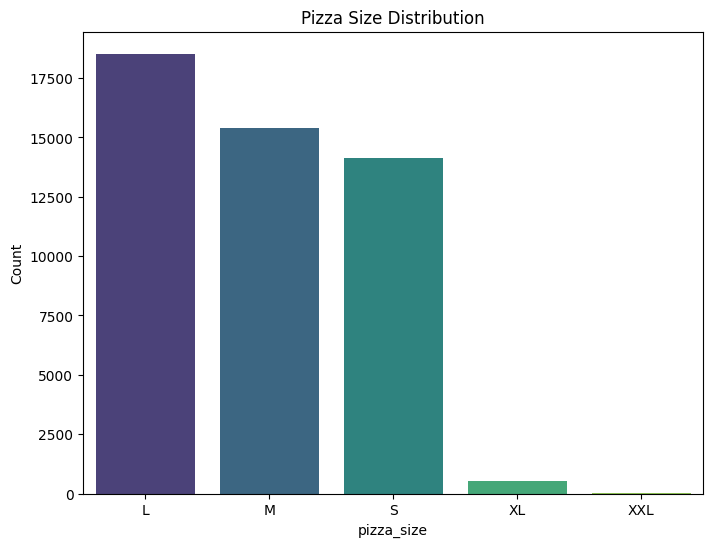

In [41]:
# Analysis and visualization
size_counts = df['pizza_size'].value_counts()
plt.figure(figsize=(8, 6))
sns.barplot(x=size_counts.index, y=size_counts.values, palette='viridis')
plt.title('Pizza Size Distribution')
plt.ylabel('Count')
plt.show()

/var/folders/1w/85n827hn1qx7xq3fxfdd4v1m0000gn/T/ipykernel_72036/2358823931.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=type_counts.index, y=type_counts.values, palette='pastel')


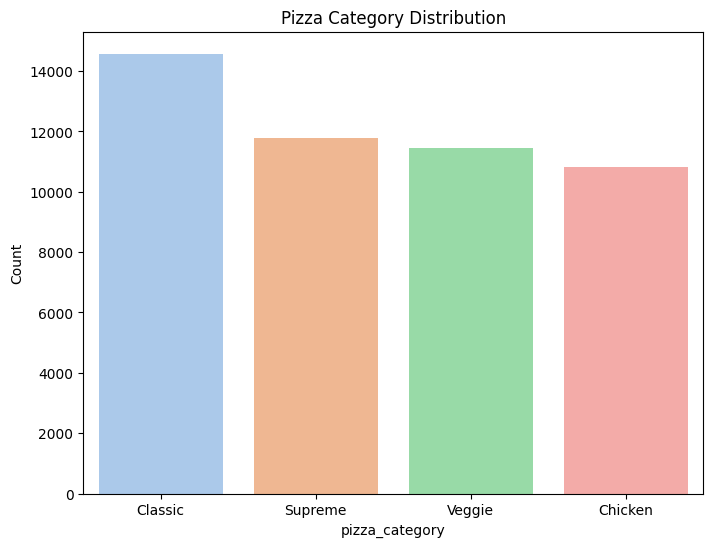

In [42]:
type_counts = df['pizza_category'].value_counts()
plt.figure(figsize=(8, 6))
sns.barplot(x=type_counts.index, y=type_counts.values, palette='pastel')
plt.title('Pizza Category Distribution')
plt.ylabel('Count')
plt.show()

/var/folders/1w/85n827hn1qx7xq3fxfdd4v1m0000gn/T/ipykernel_72036/391233136.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=quantity_distribution.index, y=quantity_distribution.values, palette='coolwarm')


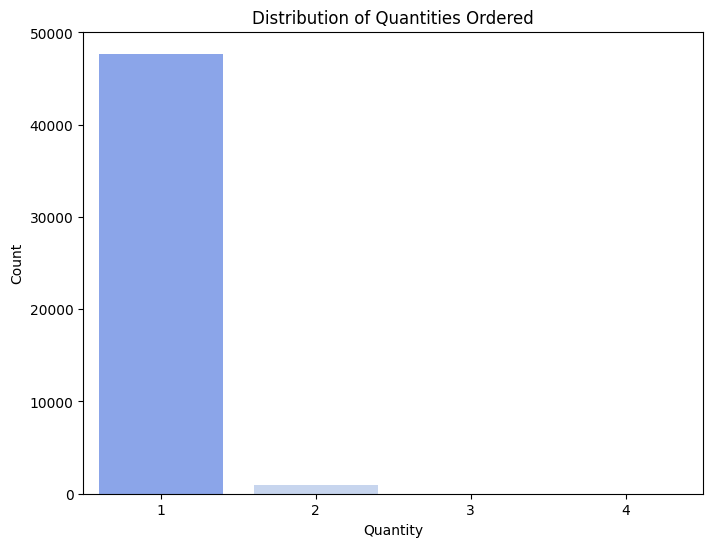

In [43]:
quantity_distribution = df['quantity'].value_counts()
plt.figure(figsize=(8, 6))
sns.barplot(x=quantity_distribution.index, y=quantity_distribution.values, palette='coolwarm')
plt.title('Distribution of Quantities Ordered')
plt.xlabel('Quantity')
plt.ylabel('Count')
plt.show()

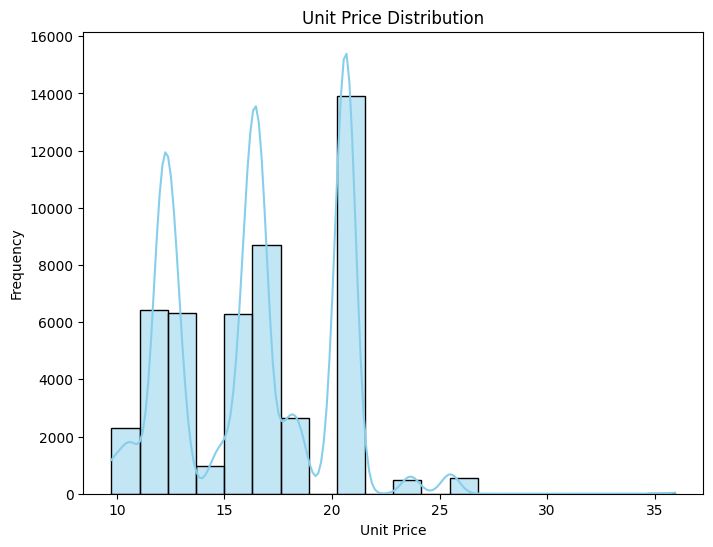

In [44]:
plt.figure(figsize=(8, 6))
sns.histplot(df['unit_price'], bins=20, kde=True, color='skyblue')
plt.title('Unit Price Distribution')
plt.xlabel('Unit Price')
plt.ylabel('Frequency')
plt.show()

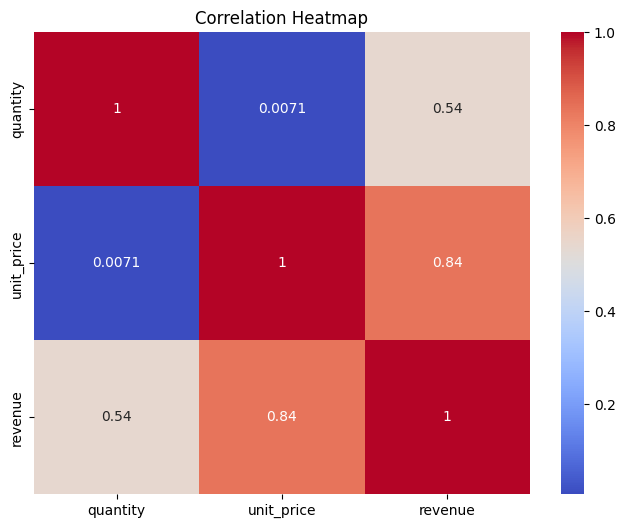

In [45]:
plt.figure(figsize=(8, 6))
sns.heatmap(df[['quantity', 'unit_price', 'revenue']].corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

/var/folders/1w/85n827hn1qx7xq3fxfdd4v1m0000gn/T/ipykernel_72036/2470261462.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_pizzas.values, y=top_pizzas.index, palette='cool')


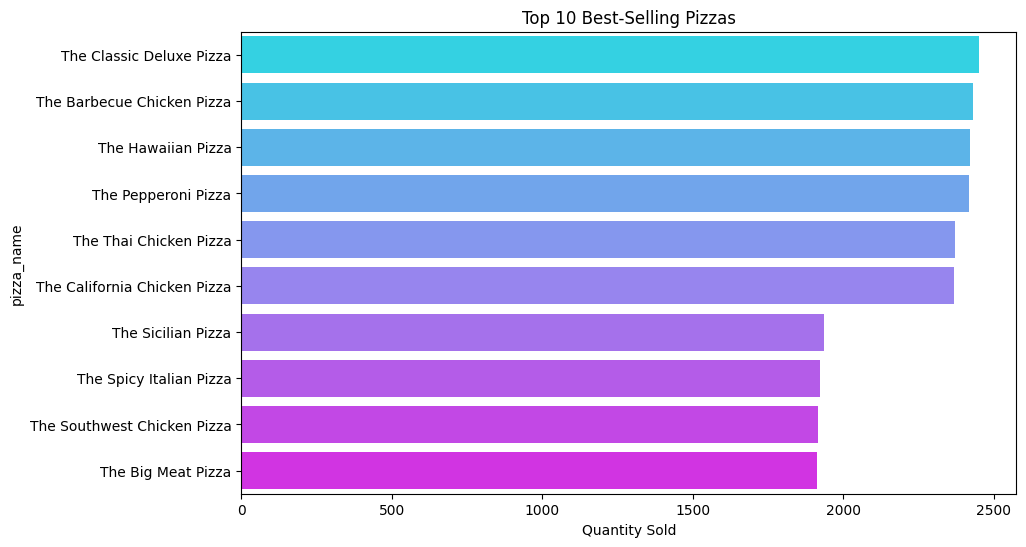

In [46]:
top_pizzas = df.groupby('pizza_name')['quantity'].sum().sort_values(ascending=False).head(10)
plt.figure(figsize=(10, 6))
sns.barplot(x=top_pizzas.values, y=top_pizzas.index, palette='cool')
plt.title('Top 10 Best-Selling Pizzas')
plt.xlabel('Quantity Sold')
plt.show()

/var/folders/1w/85n827hn1qx7xq3fxfdd4v1m0000gn/T/ipykernel_72036/81636762.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=least_pizzas.values, y=least_pizzas.index, palette='autumn')


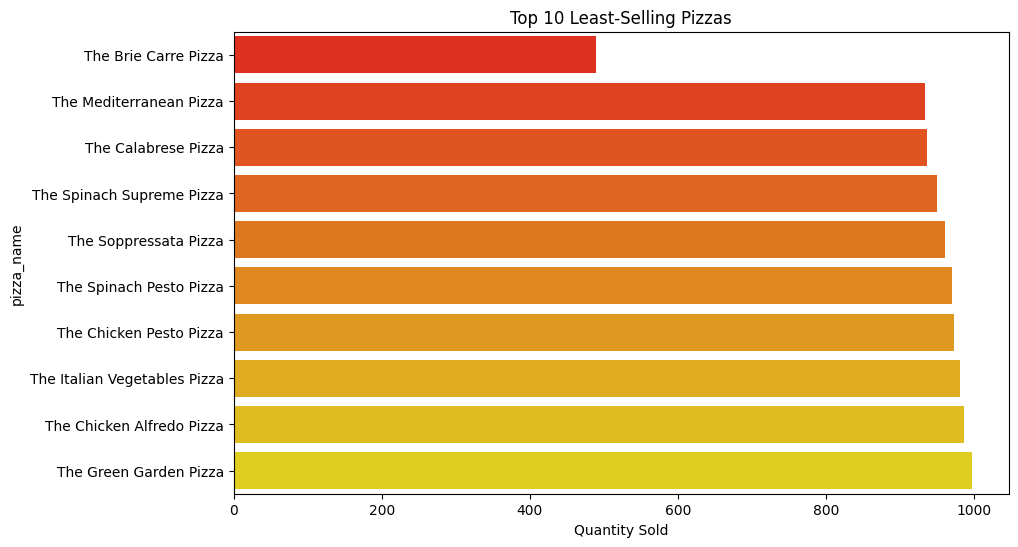

In [47]:
least_pizzas = df.groupby('pizza_name')['quantity'].sum().sort_values().head(10)
plt.figure(figsize=(10, 6))
sns.barplot(x=least_pizzas.values, y=least_pizzas.index, palette='autumn')
plt.title('Top 10 Least-Selling Pizzas')
plt.xlabel('Quantity Sold')
plt.show()

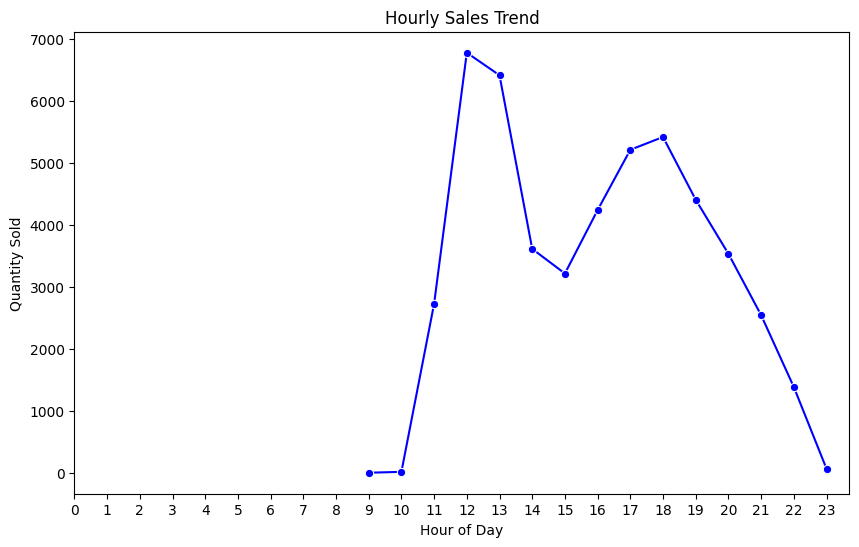

In [48]:
hourly_sales = df.groupby('order_time')['quantity'].sum()
plt.figure(figsize=(10, 6))
sns.lineplot(x=hourly_sales.index, y=hourly_sales.values, marker='o', color='blue')
plt.title('Hourly Sales Trend')
plt.xlabel('Hour of Day')
plt.ylabel('Quantity Sold')
plt.xticks(range(0, 24))
plt.show()

/var/folders/1w/85n827hn1qx7xq3fxfdd4v1m0000gn/T/ipykernel_72036/2311412987.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=monthly_revenue.index, y=monthly_revenue.values, palette='spring')


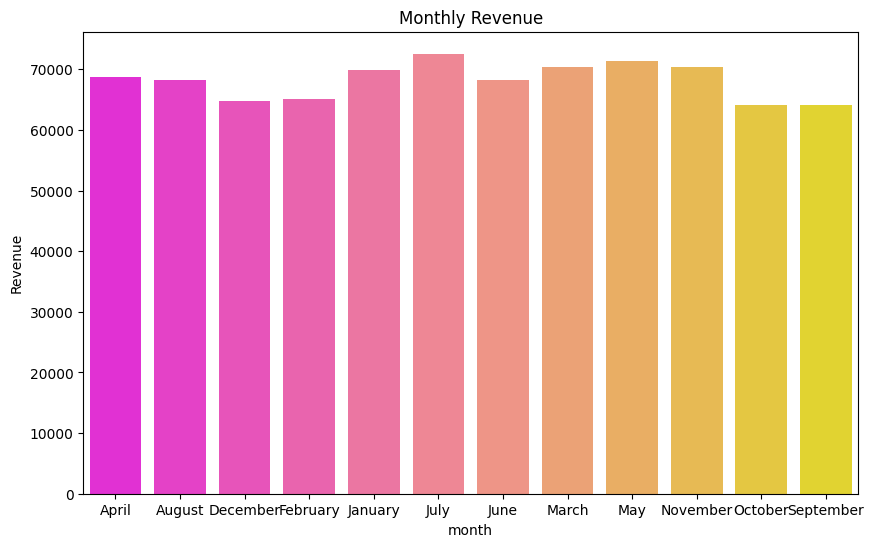

In [49]:
monthly_revenue = df.groupby('month')['revenue'].sum()
plt.figure(figsize=(10, 6))
sns.barplot(x=monthly_revenue.index, y=monthly_revenue.values, palette='spring')
plt.title('Monthly Revenue')
plt.ylabel('Revenue')
plt.show()

/var/folders/1w/85n827hn1qx7xq3fxfdd4v1m0000gn/T/ipykernel_72036/4190011761.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=day_revenue.index, y=day_revenue.values, palette='winter')


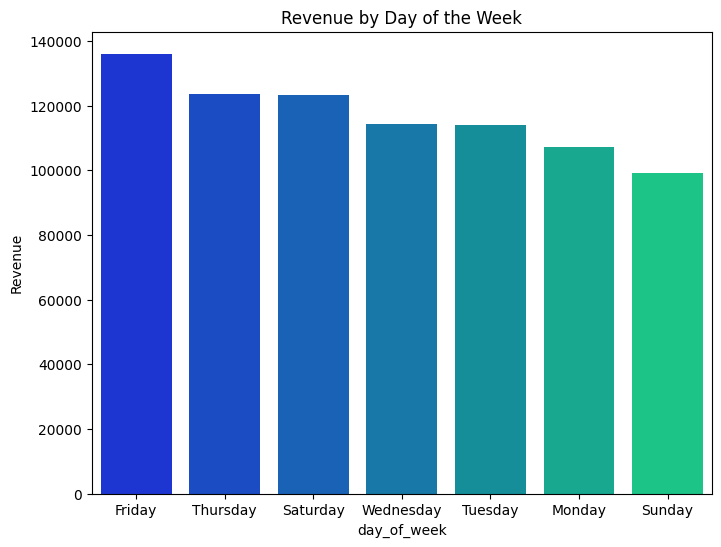

In [50]:
day_revenue = df.groupby('day_of_week')['revenue'].sum().sort_values(ascending=False)
plt.figure(figsize=(8, 6))
sns.barplot(x=day_revenue.index, y=day_revenue.values, palette='winter')
plt.title('Revenue by Day of the Week')
plt.ylabel('Revenue')
plt.show()

/var/folders/1w/85n827hn1qx7xq3fxfdd4v1m0000gn/T/ipykernel_72036/2978589302.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=ingredient_counts.values, y=ingredient_counts.index, palette='magma')


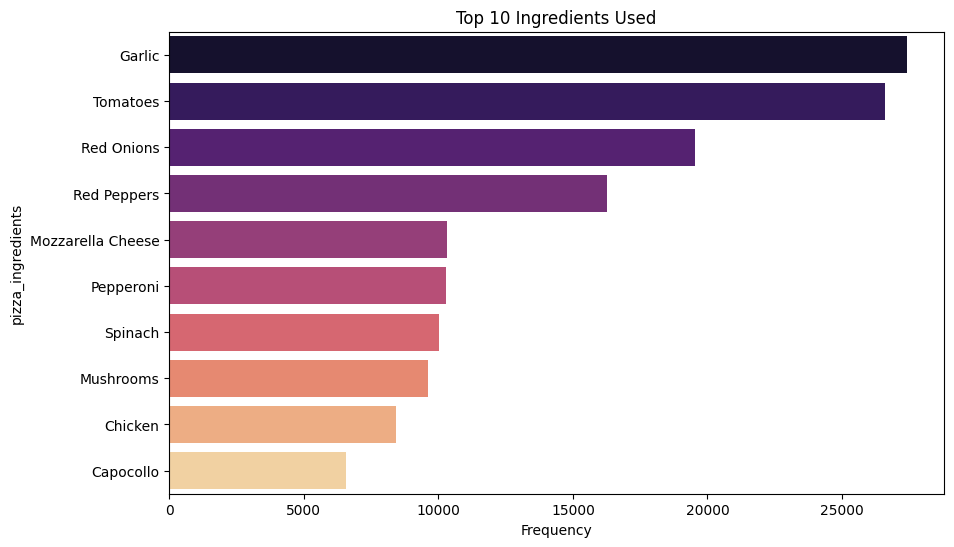

In [51]:
ingredient_counts = df['pizza_ingredients'].str.split(', ').explode().value_counts().head(10)
plt.figure(figsize=(10, 6))
sns.barplot(x=ingredient_counts.values, y=ingredient_counts.index, palette='magma')
plt.title('Top 10 Ingredients Used')
plt.xlabel('Frequency')
plt.show()

/var/folders/1w/85n827hn1qx7xq3fxfdd4v1m0000gn/T/ipykernel_72036/1917064265.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=size_revenue.index, y=size_revenue.values, palette='viridis')


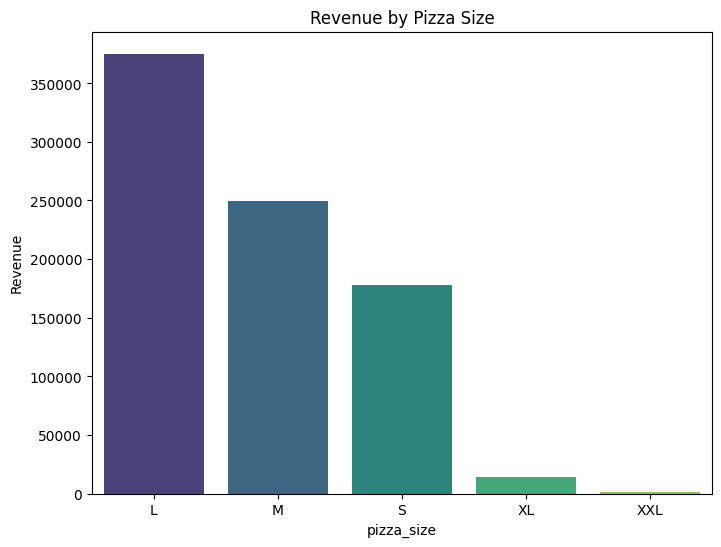

In [52]:
size_revenue = df.groupby('pizza_size')['revenue'].sum()
plt.figure(figsize=(8, 6))
sns.barplot(x=size_revenue.index, y=size_revenue.values, palette='viridis')
plt.title('Revenue by Pizza Size')
plt.ylabel('Revenue')
plt.show()

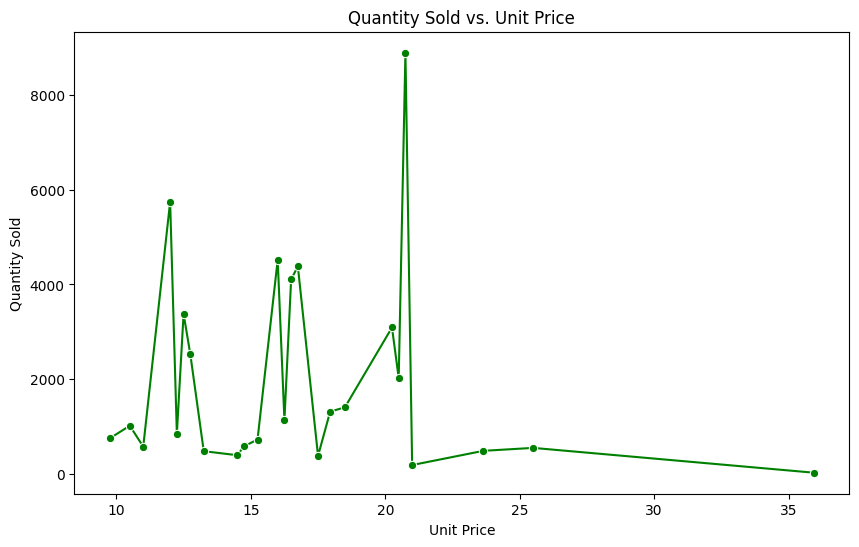

In [53]:
quantity_vs_price = df.groupby('unit_price')['quantity'].sum()
plt.figure(figsize=(10, 6))
sns.lineplot(x=quantity_vs_price.index, y=quantity_vs_price.values, marker='o', color='green')
plt.title('Quantity Sold vs. Unit Price')
plt.xlabel('Unit Price')
plt.ylabel('Quantity Sold')
plt.show()

In [54]:
findings = f"""
Findings:
1. Total revenue generated is ${df['revenue'].sum():,.2f}.
2. Total pizzas sold: {df['quantity'].sum()}.
3. The average order value is approximately ${df['revenue'].sum() / len(df['order_id'].unique()):,.2f}.
4. Peak sales occur at {hourly_sales.idxmax()}:00, while the lowest sales are at {hourly_sales.idxmin()}:00.
5. The top-selling pizzas are {', '.join(top_pizzas.index)}.
6. The least-selling pizzas are {', '.join(least_pizzas.index)}.
7. Popular ingredients include {', '.join(ingredient_counts.index)}.
8. Large pizzas generate the highest revenue compared to other sizes.
9. The highest revenue occurs in {monthly_revenue.idxmax()}.
10. Fridays and Saturdays drive the most revenue.
"""

In [55]:
recommendations = """
Recommendations:
1. Optimize staffing and resources during peak hours and on Fridays and Saturdays.
2. Introduce promotions during off-peak hours to boost sales.
3. Bundle best-selling pizzas with sides or drinks to increase the average order value.
4. Reevaluate or replace the least-selling pizzas to improve product performance.
5. Ensure high stock levels of popular ingredients to avoid shortages during peak times.
6. Emphasize large pizza promotions, as they contribute most significantly to revenue.
7. Develop seasonal campaigns aligned with monthly revenue trends to capitalize on high-performing months.
"""

In [57]:
print(findings)


Findings:
1. Total revenue generated is $817,860.05.
2. Total pizzas sold: 49574.
3. The average order value is approximately $38.31.
4. Peak sales occur at 12:00, while the lowest sales are at 9:00.
5. The top-selling pizzas are The Classic Deluxe Pizza, The Barbecue Chicken Pizza, The Hawaiian Pizza, The Pepperoni Pizza, The Thai Chicken Pizza, The California Chicken Pizza, The Sicilian Pizza, The Spicy Italian Pizza, The Southwest Chicken Pizza, The Big Meat Pizza.
6. The least-selling pizzas are The Brie Carre Pizza, The Mediterranean Pizza, The Calabrese Pizza, The Spinach Supreme Pizza, The Soppressata Pizza, The Spinach Pesto Pizza, The Chicken Pesto Pizza, The Italian Vegetables Pizza, The Chicken Alfredo Pizza, The Green Garden Pizza.
7. Popular ingredients include Garlic, Tomatoes, Red Onions, Red Peppers, Mozzarella Cheese, Pepperoni, Spinach, Mushrooms, Chicken, Capocollo.
8. Large pizzas generate the highest revenue compared to other sizes.
9. The highest revenue occurs i

In [58]:
print(recommendations)


Recommendations:
1. Optimize staffing and resources during peak hours and on Fridays and Saturdays.
2. Introduce promotions during off-peak hours to boost sales.
3. Bundle best-selling pizzas with sides or drinks to increase the average order value.
4. Reevaluate or replace the least-selling pizzas to improve product performance.
5. Ensure high stock levels of popular ingredients to avoid shortages during peak times.
6. Emphasize large pizza promotions, as they contribute most significantly to revenue.
7. Develop seasonal campaigns aligned with monthly revenue trends to capitalize on high-performing months.

